<a href="https://colab.research.google.com/github/nguyenphucloc22/test/blob/main/W4_Fuzzylogic_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 22.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=fc2b10f0a1eb43b94662520a4d23f441fd213841b8607ad3375f22034a1c7cb9
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

6.27516490915389


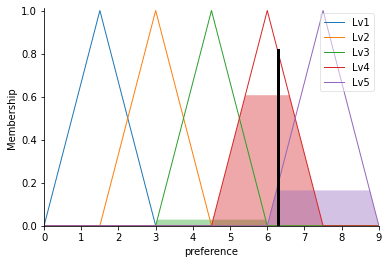

In [4]:
taste = ctrl.Antecedent(np.arange(0,10.1,0.1), 'taste')
environment = ctrl.Antecedent(np.arange(0,10.1,0.1), 'environment')
budget = ctrl.Antecedent(np.arange(0,10001,1), 'budget')
location = ctrl.Antecedent(np.arange(0,20.1,0.1), 'location')
user_review = ctrl.Antecedent(np.arange(0,5.1,0.1), 'user_review')
preference = ctrl.Consequent(np.arange(0,9.1,0.1), 'preference')
taste['Low']=fuzz.gaussmf(taste.universe,0,2)
taste['Medium']=fuzz.gaussmf(taste.universe,6,1.5)
taste['High']=fuzz.gaussmf(taste.universe,10,0.5)
environment['Low']=fuzz.gaussmf(environment.universe,0,2)
environment['Medium']=fuzz.gaussmf(environment.universe,5,2)
environment['High']=fuzz.gaussmf(environment.universe,10,3)
budget['Low']=fuzz.gaussmf(budget.universe,0,2000)
budget['Medium']=fuzz.gaussmf(budget.universe,4000,2000)
budget['High']=fuzz.gaussmf(budget.universe,10000,2000)
location['Low']=fuzz.gaussmf(location.universe,0,3)
location['Medium']=fuzz.gaussmf(location.universe,10,2)
location['High']=fuzz.gaussmf(location.universe,20,6)
user_review['Low']=fuzz.gaussmf(user_review.universe,0,0.8)
user_review['Medium']=fuzz.gaussmf(user_review.universe,3,0.6)
user_review['High']=fuzz.gaussmf(user_review.universe,5,0.2)
preference['Lv1'] = fuzz.trimf(preference.universe, [0,1.5,3])
preference['Lv2'] = fuzz.trimf(preference.universe, [1.5,3,4.5])
preference['Lv3'] = fuzz.trimf(preference.universe, [3,4.5,6])
preference['Lv4'] = fuzz.trimf(preference.universe, [4.5,6,7.5])
preference['Lv5'] = fuzz.trimf(preference.universe, [6,7.5,9])
rule = []
index = ['Low', 'Medium', 'High']
level = ['Lv1','Lv2','Lv3','Lv4','Lv5']
count=0
for a in index:
  for b in index:
    for c in index:
      for d in index:
        for e in index:
          rule.append(ctrl.Rule(taste[a]&environment[b]&budget[c]&location[d]&user_review[e], preference[level[count]]))
          if (a=='Low') and (b=='Low') and (c=='Medium'):
            count=1
          if (a=='Low') and (b=='Medium') and (c=='Medium'):
            count=2
          if (a=='Medium') and (b=='High') and (c=='Medium'):
            count=3
          if (a=='High') and (b=='High') and (c=='Medium'):
            count=4
preference_control = ctrl.ControlSystem(rule[:])
preference_simulation = ctrl.ControlSystemSimulation(preference_control)
preference_simulation.input['taste'] = 10
preference_simulation.input['environment'] = 10
preference_simulation.input['budget'] = 200
preference_simulation.input['location'] = 3
preference_simulation.input['user_review'] = 5
preference_simulation.compute()
print(preference_simulation.output['preference'])
preference.view(sim=preference_simulation)

In [ ]:
# Fuzzy logic–based clinical decision support system for the evaluation of renal function in post‐Transplant Patients

In [5]:
glycaemia = ctrl.Antecedent(np.arange(70,150,0.1),'glycaemia')
sirolimus = ctrl.Antecedent(np.arange(0,20.1,0.1),'sirolimus')
proteinuria = ctrl.Consequent(np.arange(150,4000,1),'proteinuria')

276.388888888889


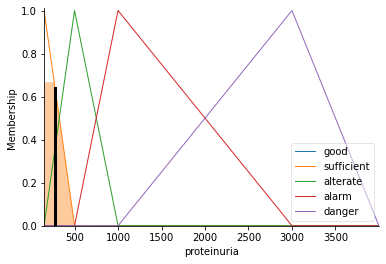

In [7]:
glycaemia['good']=fuzz.trimf(glycaemia.universe, [70,70,100])
glycaemia['alarm']=fuzz.trimf(glycaemia.universe, [70,100,126])
glycaemia['danger']=fuzz.trimf(glycaemia.universe, [126,150,150])
sirolimus['alarm_down']=fuzz.trimf(sirolimus.universe, [0,0,5])
sirolimus['sufficient']=fuzz.trimf(sirolimus.universe, [0,4,7])
sirolimus['good']=fuzz.trimf(sirolimus.universe, [6,7,12])
sirolimus['alarm_up']=fuzz.trimf(sirolimus.universe, [11,12,14])
sirolimus['danger']=fuzz.trimf(sirolimus.universe, [13,14,20])
proteinuria['good']=fuzz.trimf(proteinuria.universe, [0,0,150])
proteinuria['sufficient']=fuzz.trimf(proteinuria.universe, [0,150,500])
proteinuria['alterate']=fuzz.trimf(proteinuria.universe, [150,500,1000])
proteinuria['alarm']=fuzz.trimf(proteinuria.universe, [500,1000,3000])
proteinuria['danger']=fuzz.trimf(proteinuria.universe, [1000,3000,4000])
rule1 = ctrl.Rule(glycaemia['good']&sirolimus['good'], proteinuria['good'])
rule2 = ctrl.Rule(glycaemia['danger']&sirolimus['danger'], proteinuria['danger'])
rule3 = ctrl.Rule(glycaemia['good']&sirolimus['sufficient'], proteinuria['sufficient'])
rule4 = ctrl.Rule(glycaemia['alarm']&sirolimus['alarm_up'], proteinuria['alarm'])
rule5 = ctrl.Rule(glycaemia['alarm']&sirolimus['sufficient'], proteinuria['alterate'])
rule6 = ctrl.Rule(glycaemia['good']&sirolimus['alarm_up'], proteinuria['alterate'])
rule7 = ctrl.Rule(glycaemia['alarm']&sirolimus['good'], proteinuria['sufficient'])
rule8 = ctrl.Rule(glycaemia['good']&sirolimus['alarm_down'], proteinuria['sufficient'])
proteinuria_control = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8])
proteinuria_simulation = ctrl.ControlSystemSimulation(proteinuria_control)
proteinuria_simulation.input['glycaemia'] = 90
proteinuria_simulation.input['sirolimus'] = 7.82
proteinuria_simulation.compute()
print(proteinuria_simulation.output['proteinuria'])
proteinuria.view(sim=proteinuria_simulation)